In [2]:
from collections import defaultdict, Counter

import pandas as pd
import numpy as np

from scipy import stats

In [3]:
fpath_cohort = "../../data/glycaemia_project_csvs/data_v2/v2_gsdip.csv"

In [4]:
df_cohort = pd.read_csv(fpath_cohort)
df_cohort.head()

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
0,30000213,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
1,30000213,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
2,30000213,156.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
3,30000213,171.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
4,30000213,164.0,12.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1


In [5]:
df_cohort.stay_id.nunique()

35007

In [6]:
stay_patient_map = defaultdict(list)
df_unique_stays = df_cohort[['stay_id', 'subject_id']].drop_duplicates(subset='stay_id')
for row in df_unique_stays.itertuples():
    stay_patient_map[row.subject_id].append(row.stay_id)

In [7]:
selected_patient_ids = set()
for key in stay_patient_map:
    if len(stay_patient_map[key]) == 1:
        selected_patient_ids.add(key)

In [8]:
df = df_cohort[df_cohort.subject_id.isin(selected_patient_ids)]

<AxesSubplot:>

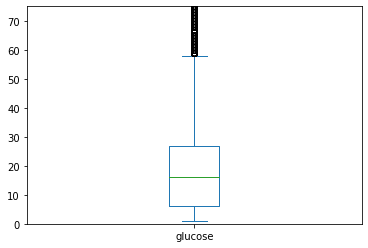

In [9]:
stay_counts_df = df.groupby(['stay_id'])['glucose'].count()
stay_counts_df.plot.box(ylim=(0,75))

In [10]:
filtered_stay_count_df = stay_counts_df[(6 <= stay_counts_df) & (stay_counts_df <= 27)]

In [11]:
stay_id_set = set(filtered_stay_count_df.index)

In [12]:
filtered_df = df[df.stay_id.isin(stay_id_set)]
filtered_df

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
14,30000646,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7,0,0,0,76.248815,170.18,26.3
15,30000646,108.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,7,0,0,0,76.248815,170.18,26.3
16,30000646,144.0,17.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0,1,0,7,0,0,0,76.248815,170.18,26.3
17,30000646,86.0,27.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0,1,0,7,0,0,0,76.248815,170.18,26.3
18,30000646,119.0,55.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,7,0,0,0,76.248815,170.18,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899732,39999552,86.0,13.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.500000,172.72,21.6
899733,39999552,91.0,14.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.500000,172.72,21.6
899734,39999552,134.0,16.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.500000,172.72,21.6
899735,39999552,92.0,17.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.500000,172.72,21.6


In [13]:
filtered_df.columns

Index(['stay_id', 'glucose', 'hr', 'respiration_24hours',
       'coagulation_24hours', 'liver_24hours', 'cardiovascular_24hours',
       'cns_24hours', 'renal_24hours', 'sofa_24hours', 'dex5', 'dex>5',
       'dexPN', 'pre_dex5', 'pre_dex>5', 'pre_dexPN', 'pos_dex5', 'pos_dex>5',
       'pos_dexPN', 'SC_sa_insulin', 'SC_ma_insulin', 'SC_la_insulin',
       'PN_sa_insulin', 'IV_sa_insulin', 'pre_SC_sa_insulin',
       'pre_SC_ma_insulin', 'pre_SC_la_insulin', 'pre_PN_sa_insulin',
       'pre_IV_sa_insulin', 'pos_SC_sa_insulin', 'pos_SC_ma_insulin',
       'pos_SC_la_insulin', 'pos_PN_sa_insulin', 'pos_IV_sa_insulin',
       'subject_id', 'hadm_id', 'gender', 'dod', 'admittime', 'dischtime',
       'los_hospital', 'admission_age', 'ethnicity', 'hospital_expire_flag',
       'hospstay_seq', 'first_hosp_stay', 'icu_intime', 'icu_outtime',
       'los_icu', 'icustay_seq', 'first_icu_stay', 'age_score',
       'myocardial_infarct', 'congestive_heart_failure',
       'peripheral_vascular_dis

In [14]:
column_subset = ['sofa_24hours', 'liver_24hours', 'weight_kg', 'height_cm', 'bmi', 'cns_24hours', 'admission_age', 'cardiovascular_24hours',
                    'pre_dexPN', 'dexPN', 'pos_dexPN', 'charlson_comorbidity_index', 'dex5', 'dex>5', 'pos_dex5', 'pos_dex>5',
                    'pre_dex>5', 'pre_dex5', 'coagulation_24hours', 'respiration_24hours', 'renal_24hours',
                    'PN_sa_insulin', 'IV_sa_insulin',  'pre_PN_sa_insulin', 'pre_IV_sa_insulin', 'pos_PN_sa_insulin', 'pos_IV_sa_insulin',
                    'hr', 'subject_id', 'stay_id']

In [16]:
raw_covariate_df = filtered_df[column_subset]
raw_covariate_df

,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,admission_age,cardiovascular_24hours,pre_dexPN,dexPN,...,renal_24hours,PN_sa_insulin,IV_sa_insulin,pre_PN_sa_insulin,pre_IV_sa_insulin,pos_PN_sa_insulin,pos_IV_sa_insulin,hr,subject_id,stay_id
14,0.0,0.0,76.248815,170.18,26.3,0.0,44,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,12207593,30000646
15,1.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,4.0,12207593,30000646
16,3.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,17.0,12207593,30000646
17,3.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,27.0,12207593,30000646
18,1.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,55.0,12207593,30000646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899732,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,0.0,0.0,...,0.0,0.0,1.833003,0.0,3.999280,0.0,1.99964,13.0,11256534,39999552
899733,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,0.0,0.0,...,0.0,0.0,0.999820,0.0,3.832643,0.0,1.99964,14.0,11256534,39999552
899734,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,0.0,0.0,...,0.0,0.0,0.999820,0.0,1.999640,0.0,0.00000,16.0,11256534,39999552
899735,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,0.0,0.0,...,0.0,0.0,0.533237,0.0,1.999640,0.0,0.00000,17.0,11256534,39999552


In [18]:
tube_feeding_cols = ['pre_dexPN', 'dexPN', 'pos_dexPN']
dextrose_cols = ['dex5', 'dex>5', 'pos_dex5', 'pos_dex>5','pre_dex>5', 'pre_dex5']
insulin_cols = ['PN_sa_insulin', 'IV_sa_insulin',  'pre_PN_sa_insulin', 'pre_IV_sa_insulin', 'pos_PN_sa_insulin', 'pos_IV_sa_insulin']

covariate_df = raw_covariate_df.copy()
covariate_df['tube_feeding'] = raw_covariate_df[tube_feeding_cols].mean(axis=1)
covariate_df['dextrose'] = raw_covariate_df[dextrose_cols].mean(axis=1)
covariate_df['insulin'] = raw_covariate_df[insulin_cols].mean(axis=1)
covariate_df.drop(labels=tube_feeding_cols+dextrose_cols+insulin_cols, inplace=True, axis=1)
covariate_df

,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,admission_age,cardiovascular_24hours,charlson_comorbidity_index,coagulation_24hours,respiration_24hours,renal_24hours,hr,subject_id,stay_id,tube_feeding,dextrose,insulin
14,0.0,0.0,76.248815,170.18,26.3,0.0,44,0.0,7,0.0,0.0,0.0,0.0,12207593,30000646,0.0,0.000000,0.000000
15,1.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,7,0.0,0.0,0.0,4.0,12207593,30000646,0.0,2.500000,0.000000
16,3.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,7,0.0,2.0,0.0,17.0,12207593,30000646,0.0,2.500000,0.000000
17,3.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,7,0.0,2.0,0.0,27.0,12207593,30000646,0.0,0.000000,0.000000
18,1.0,0.0,76.248815,170.18,26.3,0.0,44,1.0,7,0.0,0.0,0.0,55.0,12207593,30000646,0.0,2.916667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899732,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,4,0.0,3.0,0.0,13.0,11256534,39999552,0.0,0.918011,1.305320
899733,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,4,0.0,3.0,0.0,14.0,11256534,39999552,0.0,0.969222,1.138684
899734,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,4,0.0,3.0,0.0,16.0,11256534,39999552,0.0,0.713331,0.499910
899735,8.0,0.0,64.500000,172.72,21.6,4.0,72,1.0,4,0.0,3.0,0.0,17.0,11256534,39999552,0.0,0.747886,0.422146


In [129]:
for index, value in filtered_df.isna().sum().iteritems():
    print(index, value)

stay_id 0
glucose 0
hr 0
respiration_24hours 0
coagulation_24hours 0
liver_24hours 0
cardiovascular_24hours 0
cns_24hours 0
renal_24hours 0
sofa_24hours 0
dex5 0
dex>5 0
dexPN 0
pre_dex5 0
pre_dex>5 0
pre_dexPN 0
pos_dex5 0
pos_dex>5 0
pos_dexPN 0
SC_sa_insulin 0
SC_ma_insulin 0
SC_la_insulin 0
PN_sa_insulin 0
IV_sa_insulin 0
pre_SC_sa_insulin 0
pre_SC_ma_insulin 0
pre_SC_la_insulin 0
pre_PN_sa_insulin 0
pre_IV_sa_insulin 0
pos_SC_sa_insulin 0
pos_SC_ma_insulin 0
pos_SC_la_insulin 0
pos_PN_sa_insulin 0
pos_IV_sa_insulin 0
subject_id 0
hadm_id 0
gender 0
dod 186740
admittime 0
dischtime 0
los_hospital 0
admission_age 0
ethnicity 0
hospital_expire_flag 0
hospstay_seq 0
first_hosp_stay 0
icu_intime 0
icu_outtime 0
los_icu 0
icustay_seq 0
first_icu_stay 0
age_score 0
myocardial_infarct 0
congestive_heart_failure 0
peripheral_vascular_disease 0
cerebrovascular_disease 0
dementia 0
chronic_pulmonary_disease 0
rheumatic_disease 0
peptic_ulcer_disease 0
mild_liver_disease 0
diabetes_without_cc

In [1]:
filtered_df.dropna()['subject_id'].nunique()

NameError: name 'filtered_df' is not defined

In [2]:
from datetime import datetime

def get_timestamp():
    current_timestamp = datetime.utcnow()
    processed_timestamp = str(current_timestamp)[:-7].replace(" ", "_").replace(":", "").replace("-", "") + "_"

    return processed_timestamp

get_timestamp()

'20220905_052231_'